# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# All Chromosomes

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.externals import joblib
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here

In [2]:
iterationNumber = 0

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_18': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-10L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-11L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-12L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-13L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-2L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-3L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-4L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-5L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\ch

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)
X_test_name['chr_18_p11_deletion']['0']

['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18_p11_deletion\\183873-del(18)(p11)-12R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18_p11_deletion\\183873-del(18)(p11)-1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18_p11_deletion\\183873-del(18)(p11)-4R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18_p11_deletion\\190325-10.jpg_18p11.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18_p11_deletion\\190325-11.jpg_18p11.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18_p11_deletion\\190325-17.jpg_18p11.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18_p11_deletion\\190325-18.jpg_18p11.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18_p11_deletion\\190325-5.jpg_18p11.bmp',
 'D:\\Users\\Chuan\\Documents\\

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_18': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-10L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-11L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-12L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-13L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-14L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-2L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-3L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-

# Iteration Starts Here:

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  0
chr_18
   Train: 
        181228-i(18)(q10)+18-10L.bmp
        181228-i(18)(q10)+18-11L.bmp
        181228-i(18)(q10)+18-12L.bmp
        181228-i(18)(q10)+18-13L.bmp
        181228-i(18)(q10)+18-2L.bmp
        181228-i(18)(q10)+18-3L.bmp
        181228-i(18)(q10)+18-4L.bmp
        181228-i(18)(q10)+18-5L.bmp
        181228-i(18)(q10)+18-7L.bmp
        181228-i(18)(q10)+18-9L.bmp
        183873-del(18)(p11)-10L.bmp
        183873-del(18)(p11)-12L.bmp
        183873-del(18)(p11)-14L.bmp
        183873-del(18)(p11)-15L.bmp
        183873-del(18)(p11)-17L.bmp
        183873-del(18)(p11)-18L.bmp
        183873-del(18)(p11)-19L.bmp
        183873-del(18)(p11)-1L.bmp
        183873-del(18)(p11)-20L.bmp
        183873-del(18)(p11)-21L.bmp
        183873-del(18)(p11)-22L.bmp
        183873-del(18)(p11)-23L.bmp
        183873-del(18)(p11)-24L.bmp
        183873-del(18)(p11)-2L.bmp
        183873-del(18)(p11)-4L.bmp
        183873-del(18)(p11)-5L.bmp
        183873-del(18)(p11)-6

### 3.1.1. Helper Functions

In [7]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [8]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [9]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

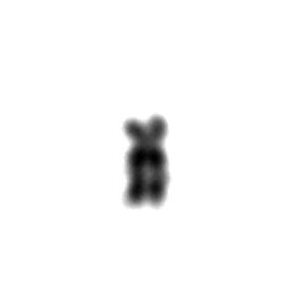

In [10]:
image['chr_18'][1] # 测试一下图像对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [11]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

#### Train 2D to 1D

In [12]:
data_flat = {}

for chrNo in data.keys():
    data_flat[chrNo] = []
    for case in data[chrNo]:
        case_flat = []
        for row in case:
            for column in row:
                case_flat.append(column)            
        data_flat[chrNo].append(case_flat)

In [13]:
x_train_list = []
y_train_list = []

for y, x in data_flat.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [14]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [15]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

#### Test 2D to 1D

In [16]:
data_flat = {}

for chrNo in data.keys():
    data_flat[chrNo] = []
    for case in data[chrNo]:
        case_flat = []
        for row in case:
            for column in row:
                case_flat.append(column)            
        data_flat[chrNo].append(case_flat)

In [17]:
x_test_list = []
y_test_list = []

for y, x in data_flat.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [18]:
chromConvert = {
               'chr_18': 0,                
                'chr_18_p11_deletion': 1
               }

In [19]:
chromConvert_reverse = {0: 'chr_18',
                        1: 'chr_18_p11_deletion'
               }

In [20]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [21]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [22]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [23]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [24]:
len(X_train)

200

In [25]:
X_train[0].shape

(90000,)

## 3.2. Support Vector Machine

In [26]:
start = time.time()



clf = svm.SVC(kernel='linear', decision_function_shape='ovo')
clf.fit(X_train, y_train)

end = time.time()

In [27]:
print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[-1.21972744e-19 -1.21972744e-19 -1.21972744e-19 ... -1.21972744e-19
  -1.21972744e-19 -1.21972744e-19]]
b =  [-2.46205314]
Indices of support vectors =  [  7  13  14  15  31  36  38  40  41  42  72  74  78  81  99 109 132 133
 135 141 143 144 145 146 147 148 149 152 153 156 157 158 159 161 164 175
 184 197]
Support vectors =  [[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]
Number of support vectors for each class =  [19 19]
Coefficients of the support vector in the decision function =  [[3.18907654e-08 2.28997259e-08 1.01026037e-07 2.56343523e-08
  8.53054883e-08 5.31163377e-08 4.11533897e-09 8.73268714e-08
  7.09742315e-08 1.83026029e-07 2.66127506e-07 4.83375209e-07
  2.50963906e-07 1.57726830e-07 9.99447571e-08 2.91935822e-07
  4.74306054e-08 1.63275351e-07 3.07559458e-08 4.40665261e-08
  2.00195340

## 3.8 Save the Model

In [28]:
c = joblib.dump(clf, 'model_Chr_18_svm_iteration_'+str(iterationNumber))
print(c)

['model_Chr_18_svm_iteration_0']


C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-pac

## 3.9 Load the Model

In [29]:
model_reload = joblib.load('model_Chr_18_svm_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.1. Accuracy

In [30]:
acc = model_reload.score(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 1.000


In [31]:
len(X_test)

51

In [32]:
y_predict = model_reload.predict(X_test)

In [33]:
len(y_predict)

51

# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(32):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [34]:
label = ['chr_18', 'chr_18_p11_deletion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.2. Classification Report

In [35]:
performanceReport = classification_report(y_test, y_predict, target_names=label_convert)

# Change here for different iteration!!!!!

print(performanceReport)

                     precision    recall  f1-score   support

             chr_18       1.00      1.00      1.00        36
chr_18_p11_deletion       1.00      1.00      1.00        15

          micro avg       1.00      1.00      1.00        51
          macro avg       1.00      1.00      1.00        51
       weighted avg       1.00      1.00      1.00        51



### 3.10.3. Confusion Matrix

In [36]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_18_KaryoType_SVM' + str(iterationNumber) + '.csv')
confusion

,chr_18,chr_18_p11_deletion
chr_18,36,0
chr_18_p11_deletion,0,15


### 3.10.4 Rate of Confusion Matrix

In [37]:
subtotal = [0] * 2 
for item in y_test:
    subtotal[item] = subtotal[item] + 1

In [38]:
cm_r = []
for i in range(2):
    cm_r.append(cm[i]/subtotal[i])

In [39]:
cm_array = np.array(cm_r)

In [40]:
confusion_r = pd.DataFrame(cm_r, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Rate_KaryoType_SVM' + str(iterationNumber) + '.csv')
confusion_r

,chr_18,chr_18_p11_deletion
chr_18,1.0,0.0
chr_18_p11_deletion,0.0,1.0


#### Heat Map: Number

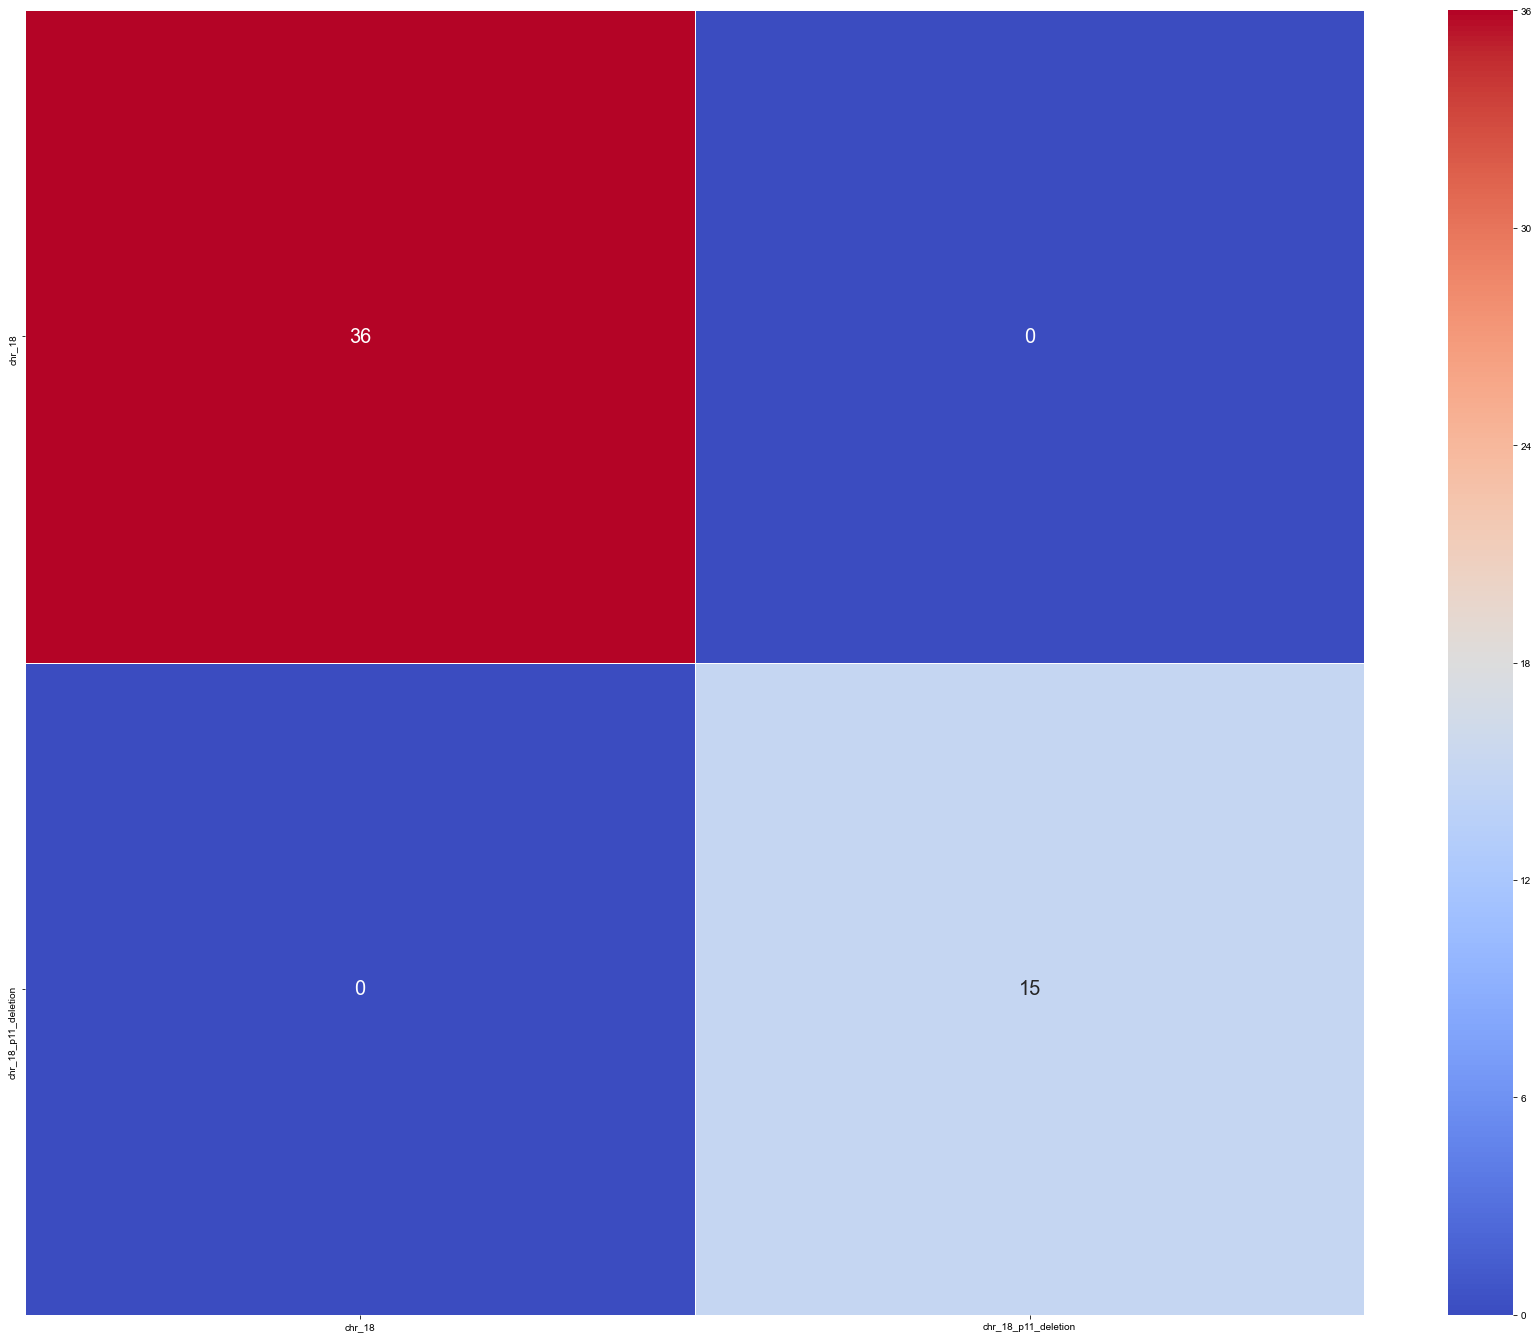

In [41]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

#### Heat Map: Rate (important!!!)

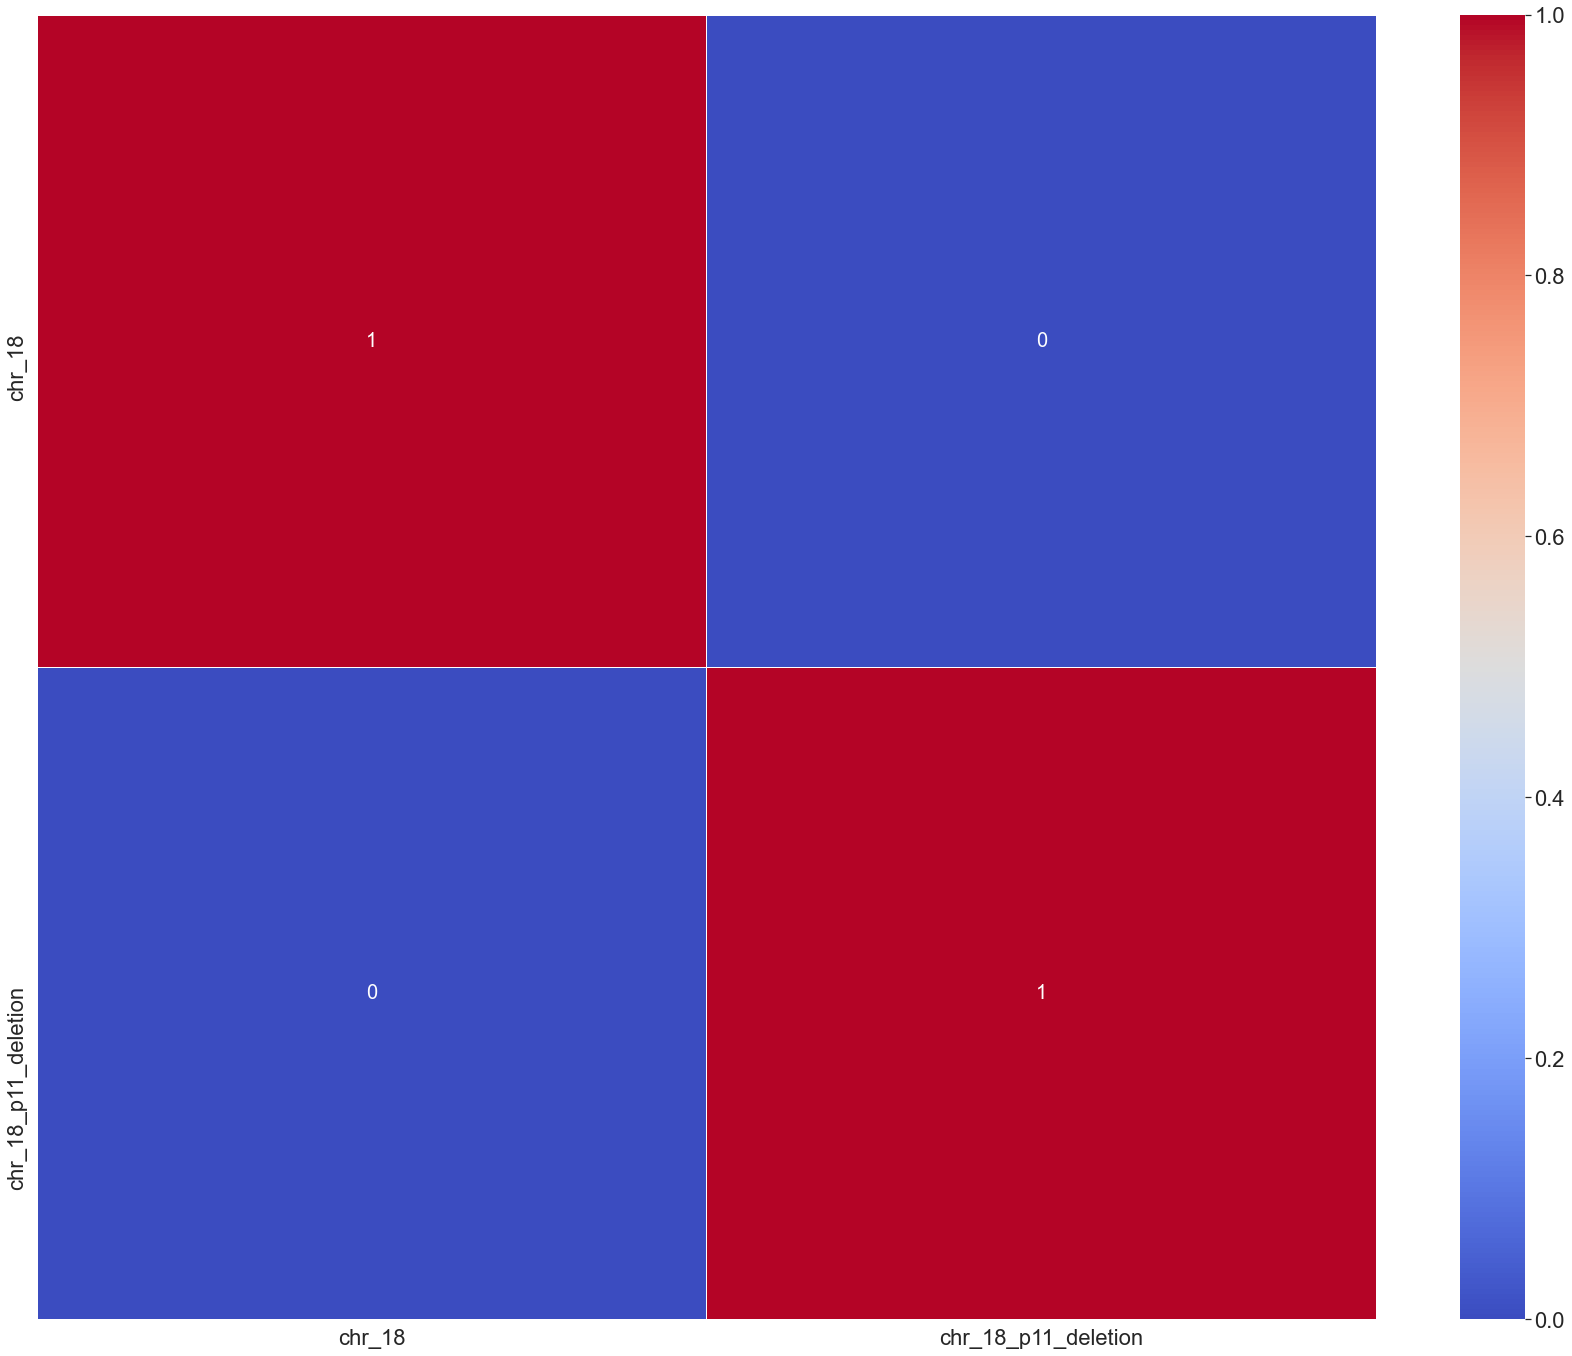

In [42]:
plt.figure(figsize=(30, 24))
heat_map_r = sb.heatmap(confusion_r, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [43]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Iteration_' + str(iterationNumber) + '.png', dpi=400)

In [44]:
fig_r = heat_map_r.get_figure()    
fig_r.savefig('Heatmap_Rate_Iteration_' + str(iterationNumber) + '.png', dpi=400)

# Results

In [45]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 1.000


In [46]:
print(performanceReport)

                     precision    recall  f1-score   support

             chr_18       1.00      1.00      1.00        36
chr_18_p11_deletion       1.00      1.00      1.00        15

          micro avg       1.00      1.00      1.00        51
          macro avg       1.00      1.00      1.00        51
       weighted avg       1.00      1.00      1.00        51



In [47]:
type(performanceReport)

str

In [48]:
confusion

,chr_18,chr_18_p11_deletion
chr_18,36,0
chr_18_p11_deletion,0,15


## Export to a text file

In [49]:
file_report = open('Results_'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()